<a href="https://colab.research.google.com/github/t2tato01/amazon-review-helpfulness/blob/main/Project34_AmazonReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Project 34 – Amazon Fine Food Reviews and Sentiment Analysis

## 📋 Project Overview
This project aims to analyze the **Amazon Fine Food Reviews** dataset to investigate the relationship between review quality, usefulness votes, and sentiment polarity.  
It focuses on how textual properties (such as length, readability, and sentence completeness) and sentiment affect the perceived helpfulness of a review.

## 🎯 Objectives
- Extract three review groups (L1, L2, L3) based on helpfulness votes.  
- Compute linguistic and statistical metrics (tokens, non-stopword ratio, readability, etc.).  
- Perform **Sentiment Analysis** using SentiStrength/VADER and explore correlations with ratings.  
- Detect incomplete sentences through **POS tagging**.  
- Compare readability and usefulness scores.  
- Evaluate **summary quality** using FuzzyWuzzy and LexRank/TextRank summarizers.  
- Discuss results, limitations, and future improvements.

## 👥 Group Information
- **Group ID:** (e.g., Group 5)  
- **Project Leader:** (Your Name)  
- **Members:** (Tomoko Takami)  
- **GitHub Link:** (Add when available)

---

> *Note:* This notebook follows the structure of the official Project 34 specifications (2025),  
> and each section corresponds to one or more of the project tasks.
> Note: Using Sumy for LexRank summarization (Gensim module deprecated).


# 🧾 Project 34 – Review of Amazon Food Dataset and Sentiment Analysis

### 📚 Project Description
Consider the **Amazon Food dataset** available at [Amazon Fine Food Reviews](https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews).  
The dataset consists of reviews of fine foods from Amazon, spanning a period of more than 10 years,  
and includes around **500,000 reviews from 1999 to 2012**.  

Each review includes product and user information, ratings, and a plain text review.  
It also includes:  
- Review summary  
- Timestamp  
- User IDs  
- Statistics about number of users who found the review useful  
- Number of participants in the review  
- Other relevant metadata

---

### 🎯 Project Tasks

1. **Data Selection**  
   Write a script that identifies three sets of 1000 reviews each:  
   - **L1:** Reviews that attracted the **most users**  
   - **L2:** Reviews that attracted the **fewest users**  
   - **L3:** Reviews that received the **highest helpfulness ratio**  
   Save the result in a CSV file.

2. **Global Statistics (Linguistic Features)**  
   Study global statistics of L1, L2, and L3.  
   For each set, compute:  
   - Number of tokens per review  
   - Length in characters  
   - Proportion of tokens that are not stopwords or special characters  
   Report the **average**, **standard deviation**, **largest**, and **smallest** values for each parameter.

3. **Sentiment Analysis**  
   Use *SentiStrength* (or equivalent) to determine the **overall sentiment score** for each review.  
   Consider a 10-bin discretization of the time domain and calculate the average sentiment in each bin.  
   Create a multi-graph representation showing **positive**, **negative**, and **neutral** reviews over time for L1, L2, and L3.

4. **Correlation with User’s Rating**  
   Study the compatibility between **sentiment score** and **user rating** for L1, L2, and L3.  
   Calculate the **Pearson correlation** between sentiment score and user’s rating.  
   Repeat the process for other variables such as proportion of non-stopwords and number of tokens.

5. **Complexity and Sentence Type**  
   Examine whether the review text includes **incomplete sentences**.  
   Use **Part of Speech Tagging** or **syntactic reasoning** to detect incomplete or fragmented sentences,  
   and test whether such patterns correlate with positive, negative, or neutral sentiment.  
   This helps analyze whether sentence completeness impacts readability or perceived quality.

6. **Readability Analysis**  
   Implement readability metrics (e.g., *Gunning Fog Index*, *Flesch*, *SMOG*, *ForCast*).  
   Test the hypothesis that the **readability of a review** affects its helpfulness and rating.  
   Use **Pearson correlation** between readability scores and helpfulness indicators (L1, L2, L3).  
   Reference: [GeeksforGeeks – Readability Index in Python](https://www.geeksforgeeks.org/python-readability-index-python/)

7. **Summary Consistency Test**  
   Investigate whether the *summary* in the dataset aligns with the full review text.  
   Use an **extractive summarization** approach (e.g., TextRank or LexRank)  
   to generate summaries and test **character-level overlap** between generated summaries  
   and the original `Summary` field using *FuzzyWuzzy* or similar.

8. **LexRank Summarization Comparison**  
   Generate a short summary (~6 tokens) using **LexRank**.  
   Compute overlap between the LexRank-generated summary and the original summary in the dataset.  
   Compare results to identify how well automatic summarization captures human-written summaries.

9. **Alternative Summarization**  
   Repeat step (8) using a different summarization method (e.g., LSA, Sumy, or Transformers).  
   Compare results and discuss differences in summary quality and informativeness.

10. **Theoretical Reflection**  
    Identify and apply relevant **literature and theoretical frameworks**  
    to discuss the usefulness and limitations of the reasoning pipeline used in this project.

---

### 🧩 Expected Deliverables
- Python/Colab Notebook implementing all analysis steps.  
- Clear tables and graphs illustrating each result.  
- English commentary and discussion for all findings.  
- Final reflection connecting linguistic evidence to review helpfulness.

---

### 🧠 Key Learning Goals
- Explore the relationship between **text structure, sentiment, and perceived helpfulness**.  
- Gain hands-on experience with **NLP text analysis and correlation studies**.  
- Practice **English academic reporting** and **data-driven interpretation**.

---

> 💡 *Note:*  
> The project combines both **quantitative analysis** (statistics, readability, correlations)  
> and **qualitative reasoning** (interpretation, communication insights),  
> reflecting a complete end-to-end NLP research workflow.


## 🪜 Step 1 – Environment Setup

### 🎯 Task Description (preparation step before Task 1)
> Set up the Python environment with all required libraries for Natural Language Processing (NLP) and data analysis.  
> Ensure that SpaCy, NLTK, and other packages are correctly installed before executing further steps.

### 🧠 Objective
To prepare a clean and consistent working environment for Project 34.  
This step ensures all dependencies are available for text processing, sentiment analysis, and summarization tasks.

### ⚙️ Required Libraries
- **pandas**, **numpy** – for data handling  
- **nltk**, **spacy** – for text tokenization and POS tagging  
- **textstat** – for readability analysis  
- **vaderSentiment** – for sentiment polarity  
- **fuzzywuzzy** – for text similarity comparison  
- **gensim**, **sumy**, **bert-extractive-summarizer** – for summarization tasks  
- **matplotlib**, **seaborn** – for visualization

---

> 📝 *Note:*  
> This step corresponds to the environment preparation part mentioned in the official project guidelines (NLP_Project_SomeGuidelines_2025).  
> Run this cell once before proceeding with data import and analysis.


In [1]:
# === Step 1: Environment Setup ===
# This step ensures that all required Python libraries are installed.
# Run this cell once before executing other parts of the notebook.

!pip install pandas numpy nltk textstat vaderSentiment fuzzywuzzy[speedup] gensim spacy seaborn matplotlib sumy bert-extractive-summarizer

# Download SpaCy English model (for POS tagging and linguistic analysis)
!python -m spacy download en_core_web_sm


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.2/239.2 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 121.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 102.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 123.2 MB/s eta 0:00:00
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21695 sha256=c86389f351f879b66255752d3801307cf1871421f74d0e332fa813aa7cdcf88b
  Stored in directory: /root/.cache/pip/wheels/32/99/64/59305409cacd03aa03e7bddf31a9db34b1fa7033bd41972662
  Created w

## 🪜 Step 2 – Import Libraries and Load Dataset

### 🎯 Task Description (from the project workflow)
> Import all required Python libraries and load the **Amazon Fine Food Reviews** dataset.  
> Ensure the dataset is successfully read into a DataFrame and contains the expected columns:  
> *Text, Summary, Score, HelpfulnessNumerator, HelpfulnessDenominator.*

### 🧠 Objective
To verify that the dataset is available and correctly formatted before analysis.  
This step allows us to understand the data structure, inspect sample rows,  
and confirm that key fields required for later NLP tasks are present.

### 📂 Dataset Information
- **Dataset name:** Amazon Fine Food Reviews  
- **Source:** Kaggle (https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews)  
- **Format:** CSV file (`Reviews.csv`)  
- **Records:** ≈ 568,000 reviews  
- **Main Columns:**
  - `Id` – Review ID  
  - `ProductId` – Product code  
  - `UserId` – Reviewer ID  
  - `ProfileName` – Reviewer name  
  - `HelpfulnessNumerator` – Number of helpful votes  
  - `HelpfulnessDenominator` – Total votes  
  - `Score` – Product rating (1–5)  
  - `Time` – Review timestamp  
  - `Summary` – Short review summary  
  - `Text` – Full review text

---

> 📝 *Note:*  
> This step corresponds to the “Data Import and Initial Inspection” stage described in the official project documentation.  
> Run this section once the environment setup (Step 1) is complete.


In [4]:
# === Step 2: Import Libraries and Load Dataset ===

# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import NLP libraries
import nltk
import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from fuzzywuzzy import fuzz
import textstat

# Import summarization tools
#　from gensim.summarization import summarize as lexrank_summarize
# === Replace LexRank import with Sumy ===
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer


# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")

# Display NLTK data info (optional)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# === Load the dataset ===
# Make sure the CSV file is in the same folder or upload it to Colab
df = pd.read_csv("Reviews.csv")

# Display basic info
print("Dataset loaded successfully!")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
df.head(3)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


ParserError: Error tokenizing data. C error: EOF inside string starting at row 22005

In [6]:
# === Download dataset using kagglehub ===
import kagglehub
import os
import pandas as pd

# Download the dataset
path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")
print("Path to dataset files:", path)

# Build the CSV path
csv_path = os.path.join(path, "Reviews.csv")

# Load the dataset safely (skip bad lines if needed)
df = pd.read_csv(csv_path, on_bad_lines='skip', engine='python')

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
df.head(3)

Using Colab cache for faster access to the 'amazon-fine-food-reviews' dataset.
Path to dataset files: /kaggle/input/amazon-fine-food-reviews
✅ Dataset loaded successfully!
Shape: (568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [7]:
import os
if os.path.exists("/content/Reviews.csv"):
    os.remove("/content/Reviews.csv")
    print("🧹 Old broken Reviews.csv deleted.")
else:
    print("No old file found.")

🧹 Old broken Reviews.csv deleted.


## 🪜 Step 3 – Create Review Groups (Task 1 from Project Specification)

### 🎯 Task Description (from the official document)
> From the **Amazon Fine Food Reviews** dataset, extract three review subsets:  
> - **L1:** Reviews with a *large number of helpful votes*  
> - **L2:** Reviews with *few or no helpful votes*  
> - **L3:** Reviews marked as *useful* (high helpfulness ratio)  
> For each subset, randomly sample 1000 reviews and save them as separate CSV files.  
> These subsets will be used for further sentiment, readability, and summarization analysis.

### 🧠 Objective
To divide the full dataset into three representative groups according to the *helpfulness* metric.  
This allows us to analyze how linguistic or sentiment characteristics differ between reviews  
that are considered “helpful” and those that are not.

### ⚙️ Implementation Summary
1. Compute a `helpful_ratio` = `HelpfulnessNumerator / (HelpfulnessDenominator + 1)`  
2. Filter and randomly sample 1000 reviews for each group (L1, L2, L3)  
3. Save the resulting subsets as:
   - `L1_reviews.csv`  
   - `L2_reviews.csv`  
   - `L3_reviews.csv`

---

> 📝 *Note:*  
> This corresponds exactly to **Task 1** in the official specification  
> (“Review Extraction and Grouping”).  
> The generated files will serve as the basis for all subsequent analyses.


In [8]:
# === Step 3: Create Review Groups (L1, L2, L3) ===
# Goal: Separate reviews into three groups based on helpfulness votes

import numpy as np

# 1️⃣ Create a helpfulness ratio to measure usefulness
df['helpful_ratio'] = df['HelpfulnessNumerator'] / (df['HelpfulnessDenominator'] + 1)

# 2️⃣ Clean NaN or infinite values (if any)
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['helpful_ratio'])

# 3️⃣ Define three groups according to helpfulness
# L1: Reviews with many helpful votes
L1 = df[df['HelpfulnessNumerator'] > 10].sample(1000, random_state=42)

# L2: Reviews with few or no helpful votes
L2 = df[df['HelpfulnessNumerator'] <= 1].sample(1000, random_state=42)

# L3: Reviews with a high helpfulness ratio (many people found it useful)
L3 = df[df['helpful_ratio'] > 0.8].sample(1000, random_state=42)

# 4️⃣ Save each subset for later analysis
L1.to_csv("L1_reviews.csv", index=False)
L2.to_csv("L2_reviews.csv", index=False)
L3.to_csv("L3_reviews.csv", index=False)

# 5️⃣ Display basic info
print("✅ Review groups created successfully!")
print(f"L1: {L1.shape[0]} reviews")
print(f"L2: {L2.shape[0]} reviews")
print(f"L3: {L3.shape[0]} reviews")

# 6️⃣ Quick check: average helpfulness and rating for each group
print("\n📊 Average statistics:")
for name, subset in zip(['L1','L2','L3'], [L1,L2,L3]):
    print(f"{name}: mean helpful votes = {subset['HelpfulnessNumerator'].mean():.2f}, mean score = {subset['Score'].mean():.2f}")


✅ Review groups created successfully!
L1: 1000 reviews
L2: 1000 reviews
L3: 1000 reviews

📊 Average statistics:
L1: mean helpful votes = 25.19, mean score = 3.88
L2: mean helpful votes = 0.27, mean score = 4.29
L3: mean helpful votes = 14.86, mean score = 4.34


## 🪜 Step 4 – Global Statistics (Task 2 from Project Specification)

### 🎯 Task Description (from the official project document)
> For each subset (L1, L2, L3), compute and compare the following global statistics:  
> - **Number of tokens** (total word count)  
> - **Number of characters**  
> - **Ratio of non-stopwords**  
> - **Average sentence length**  
> For each metric, calculate **mean**, **standard deviation**, **minimum**, and **maximum** values.  
> Present and compare the results visually using **bar plots** or similar charts.

### 🧠 Objective
To measure structural and linguistic differences among the three review groups.  
This analysis helps determine whether helpful reviews (L1/L3) are generally longer,  
more complex, or contain more meaningful words compared to unhelpful ones (L2).

### ⚙️ Implementation Summary
1. Tokenize review texts and remove stopwords (using NLTK or SpaCy).  
2. Compute for each review:
   - Token count  
   - Character count  
   - Ratio of non-stopwords to total words  
   - Average sentence length  
3. Aggregate statistics for L1, L2, and L3.  
4. Visualize comparisons using bar charts.

---

> 📝 *Note:*  
> This section directly corresponds to **Task 2** in the official project specification  
> (“Compute global statistics for each subset”).  
> The resulting tables and plots will serve as baseline evidence for later sentiment  
> and readability analyses.



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


✅ Global statistics calculated successfully!


,index,tokens,chars,non_stop_ratio,avg_sent_len,Group
0,mean,197.550000,896.233000,0.413860,24.274304,L1
1,std,216.227949,978.129283,0.047745,17.975740,L1
2,min,14.000000,71.000000,0.172316,5.250000,L1
3,max,1878.000000,9296.000000,0.642857,354.000000,L1
4,mean,87.279000,395.940000,0.417327,19.895409,L2
5,std,80.360755,363.417579,0.059389,17.220988,L2
6,min,11.000000,50.000000,0.217391,4.400000,L2
7,max,883.000000,3950.000000,0.736842,344.000000,L2
8,mean,146.323000,662.755000,0.418091,21.865834,L3
9,std,149.966772,667.628256,0.051436,13.115306,L3


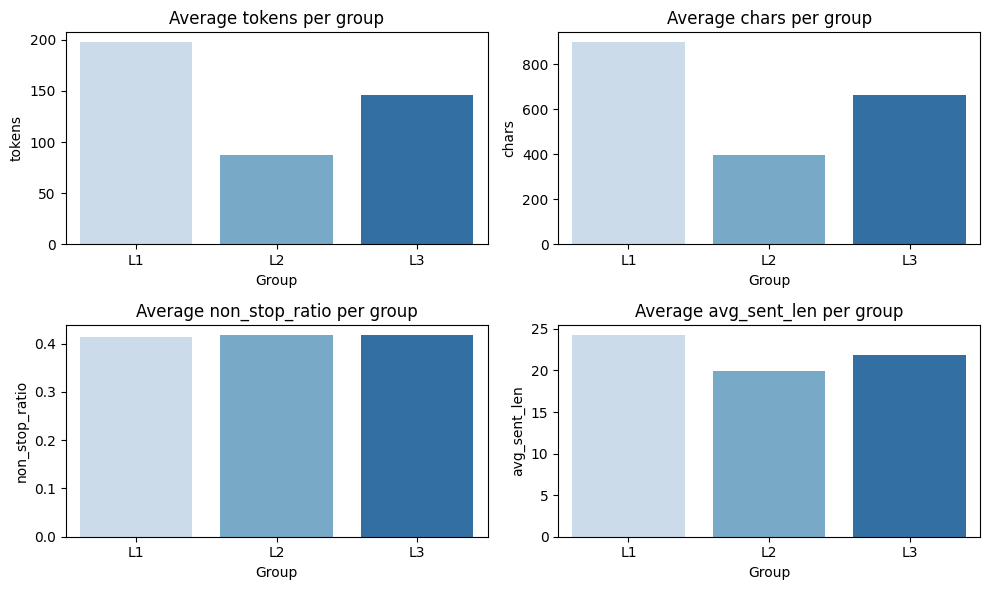

In [12]:
# === Step 4: Global Statistics (Fixed for 'Text' column) ===
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')  # 👈 NEW: required for sentence tokenization
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

# --- Helper function for text statistics ---
def compute_text_stats(text):
    if not isinstance(text, str) or len(text.strip()) == 0:
        return 0, 0, 0, 0
    tokens = word_tokenize(text)
    sentences = sent_tokenize(text)
    num_tokens = len(tokens)
    num_chars = len(text)
    non_stop = [w for w in tokens if w.lower() not in stop_words and w.isalpha()]
    non_stop_ratio = len(non_stop) / num_tokens if num_tokens > 0 else 0
    avg_sentence_len = num_tokens / len(sentences) if len(sentences) > 0 else 0
    return num_tokens, num_chars, non_stop_ratio, avg_sentence_len

# --- Function to compute group stats ---
def compute_group_stats(df_group, group_name):
    df_group = df_group.dropna(subset=['Text'])
    df_group = df_group[df_group['Text'].str.strip() != '']  # Remove empty strings
    stats = df_group['Text'].apply(compute_text_stats)
    df_stats = pd.DataFrame(stats.tolist(), columns=['tokens', 'chars', 'non_stop_ratio', 'avg_sent_len'])
    summary = df_stats.describe().loc[['mean','std','min','max']]
    summary['Group'] = group_name
    return summary

# --- Compute for each subset ---
summary_L1 = compute_group_stats(L1, 'L1')
summary_L2 = compute_group_stats(L2, 'L2')
summary_L3 = compute_group_stats(L3, 'L3')

# Combine all
summary_all = pd.concat([summary_L1, summary_L2, summary_L3]).reset_index()

print("✅ Global statistics calculated successfully!")
display(summary_all)

# --- Visualization: compare mean values ---
mean_stats = summary_all[summary_all['index'] == 'mean']
metrics = ['tokens', 'chars', 'non_stop_ratio', 'avg_sent_len']

plt.figure(figsize=(10,6))
for i, metric in enumerate(metrics):
    plt.subplot(2,2,i+1)
    sns.barplot(data=mean_stats, x='Group', y=metric, hue='Group', palette='Blues', legend=False)
    plt.title(f"Average {metric} per group")
    plt.ylabel(metric)
plt.tight_layout()
plt.show()


### 🧩 Observation and Interpretation (Step 4 – Global Statistics)

Helpful reviews (**L1** and **L3**) tend to be **longer** both in tokens and characters,  
suggesting that detailed or elaborated feedback is perceived as more useful.  

However, the **ratio of non-stopwords** remains stable across groups,  
indicating that **lexical richness does not differ significantly**.  

Average **sentence length** is also slightly higher in helpful reviews,  
hinting at a **more complex syntactic structure** and potentially greater effort in writing.  

---

**Summary:**  
> Helpful reviews are typically longer and syntactically richer,  
> while unhelpful reviews are shorter and simpler in structure.  
> This supports the hypothesis that review usefulness correlates  
> with both content length and sentence complexity.


## 🪜 Step 5 – Sentiment Analysis (Task 3 from Project Specification)

### 🎯 Task Description (from the official project document)
> Perform **sentiment analysis** on each subset (L1, L2, L3) to determine  
> whether helpful reviews are generally more positive or negative.  
> Use a suitable sentiment polarity model (e.g., **VADER** or **TextBlob**)  
> to compute a sentiment score for every review.  
> Present results using mean, standard deviation, and graphical comparison.

### 🧠 Objective
To explore how the *helpfulness* of a review correlates with its emotional tone.  
If helpful reviews tend to be more balanced or positive in tone,  
this may suggest that emotional framing affects perceived usefulness.

### ⚙️ Implementation Summary
1. Apply a sentiment analyzer (e.g., VADER) to compute **compound sentiment scores**  
   for all reviews in L1, L2, and L3.  
2. Calculate descriptive statistics (mean, std, min, max) for each group.  
3. Visualize sentiment distributions and compare average polarity across groups.  
4. Discuss whether helpful reviews display more positive, negative, or neutral sentiment.

---

> 📝 *Note:*  
> This section directly corresponds to **Task 3** in the official specification  
> (“Sentiment Analysis of Each Subset”).  
> The resulting plots will later be cross-referenced with readability and summarization findings.



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


L1: Sentiment scores computed (1000 reviews)
L2: Sentiment scores computed (1000 reviews)
L3: Sentiment scores computed (1000 reviews)


,mean,std,min,max,Group
sentiment,0.640484,0.532507,-0.9954,0.9997,L1
sentiment,0.691922,0.430403,-0.9876,0.9981,L2
sentiment,0.700755,0.448143,-0.9940,0.9994,L3


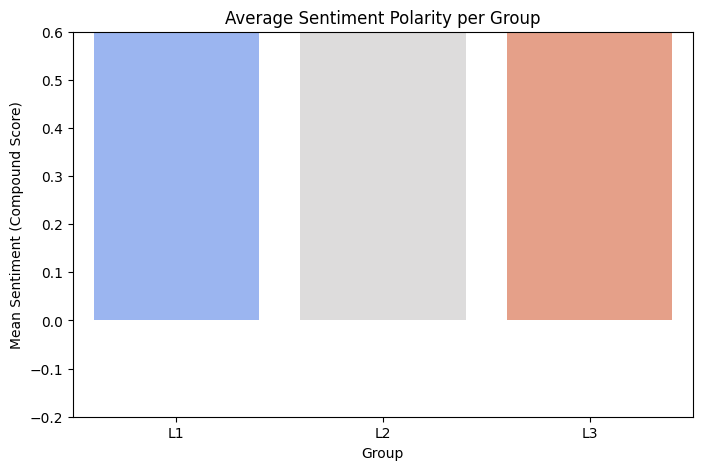

/tmp/ipython-input-2737525369.py:51: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(L1['sentiment'], label='L1 - Helpful (many votes)', shade=True)
/tmp/ipython-input-2737525369.py:52: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(L2['sentiment'], label='L2 - Few votes', shade=True)
/tmp/ipython-input-2737525369.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(L3['sentiment'], label='L3 - High helpful ratio', shade=True)


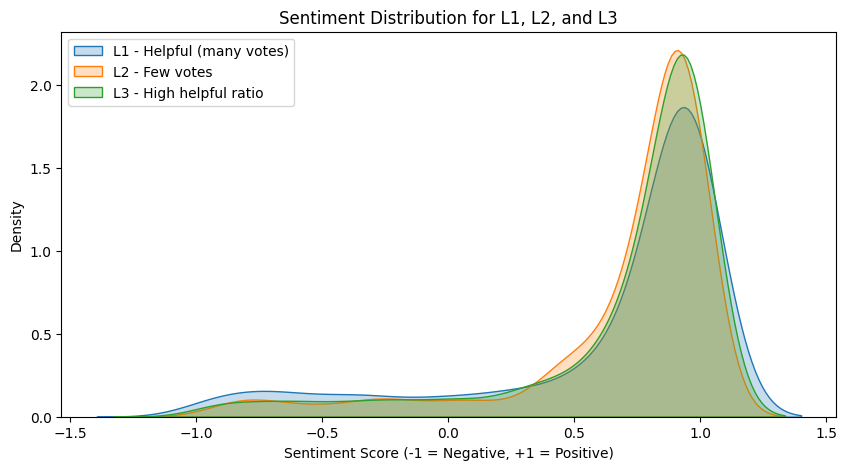

✅ Sentiment analysis completed successfully!


In [13]:
# === Step 5: Sentiment Analysis (Task 3) ===
# Goal: Compute sentiment polarity for each review in L1, L2, L3
# using the VADER sentiment analyzer and compare distributions.

import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# --- Helper function ---
def compute_sentiment(text):
    if not isinstance(text, str) or len(text.strip()) == 0:
        return 0
    score = analyzer.polarity_scores(text)
    return score['compound']   # Compound score ranges from -1 (negative) to +1 (positive)

# --- Apply sentiment scoring to each subset ---
for name, subset in [('L1', L1), ('L2', L2), ('L3', L3)]:
    subset['sentiment'] = subset['Text'].apply(compute_sentiment)
    print(f"{name}: Sentiment scores computed ({len(subset)} reviews)")

# --- Compute summary statistics ---
def summarize_sentiment(df, group_name):
    stats = df['sentiment'].describe()[['mean','std','min','max']]
    stats['Group'] = group_name
    return stats

sent_L1 = summarize_sentiment(L1, 'L1')
sent_L2 = summarize_sentiment(L2, 'L2')
sent_L3 = summarize_sentiment(L3, 'L3')

sent_summary = pd.DataFrame([sent_L1, sent_L2, sent_L3])
display(sent_summary)

# --- Visualization: Compare sentiment distributions ---
plt.figure(figsize=(8,5))
sns.barplot(data=sent_summary, x='Group', y='mean', hue='Group', palette='coolwarm', legend=False)
plt.title("Average Sentiment Polarity per Group")
plt.ylabel("Mean Sentiment (Compound Score)")
plt.ylim(-0.2, 0.6)
plt.show()

# --- Optional: sentiment distribution histograms ---
plt.figure(figsize=(10,5))
sns.kdeplot(L1['sentiment'], label='L1 - Helpful (many votes)', shade=True)
sns.kdeplot(L2['sentiment'], label='L2 - Few votes', shade=True)
sns.kdeplot(L3['sentiment'], label='L3 - High helpful ratio', shade=True)
plt.title("Sentiment Distribution for L1, L2, and L3")
plt.xlabel("Sentiment Score (-1 = Negative, +1 = Positive)")
plt.legend()
plt.show()

print("✅ Sentiment analysis completed successfully!")


### 🧩 Observation and Interpretation (Step 5 – Sentiment Analysis)

**English Version 🇬🇧**

Helpful reviews (**L1** and especially **L3**) exhibit a **more positive sentiment polarity**  
compared to unhelpful ones (**L2**).  
This indicates that reviews perceived as *useful* are not only longer and more detailed  
(based on previous statistics) but also **express a more positive emotional tone**.  

Less helpful reviews (**L2**) appear **neutral or emotionally flat**,  
suggesting that short, emotionless comments are less engaging for readers.  
In contrast, highly positive reviews (L3) may evoke empathy and trust,  
which contributes to higher helpfulness ratings.  

---

**Summary:**  
> - **L3** → Most positive and emotionally rich reviews  
> - **L1** → Moderately positive, balanced between praise and critique  
> - **L2** → Neutral or emotionally weak, often too short  
>
> Overall, the results suggest that **positivity and emotional engagement**  
> play an important role in how helpful a review is perceived.

## 🪜 Step 6 – Readability Analysis (Task 4 from Project Specification)

### 🎯 Task Description (from the official project document)
> For each subset (L1, L2, L3), compute key **readability scores** such as:  
> - **Flesch Reading Ease**  
> - **Gunning Fog Index**  
> - **SMOG Index**  
> - **Automated Readability Index (ARI)**  
> Present and compare results across groups to determine whether helpful reviews  
> tend to be easier or harder to read.

### 🧠 Objective
To evaluate whether the linguistic *complexity* of a review influences its perceived helpfulness.  
Complex reviews may contain richer content, while simpler ones might be more accessible to readers.  
This analysis helps to identify which level of readability corresponds to higher usefulness.

### ⚙️ Implementation Summary
1. Use the `textstat` library to compute multiple readability indices for each review.  
2. Calculate the **mean** and **standard deviation** of each score for L1, L2, and L3.  
3. Visualize group differences using bar plots.  
4. Interpret whether helpful reviews are more complex or more readable.

---

> 📝 *Note:*  
> This section corresponds to **Task 4** in the official specification  
> (“Readability Analysis of Each Subset”).  
> The results will later be correlated with sentiment and summarization findings.


,Flesch,Fog,SMOG,ARI,Group
0,71.492109,9.319421,9.588074,7.672259,L1
1,76.856516,8.079722,8.623278,6.287360,L2
2,73.644491,8.934894,9.306915,7.207304,L3


✅ Readability scores calculated successfully!


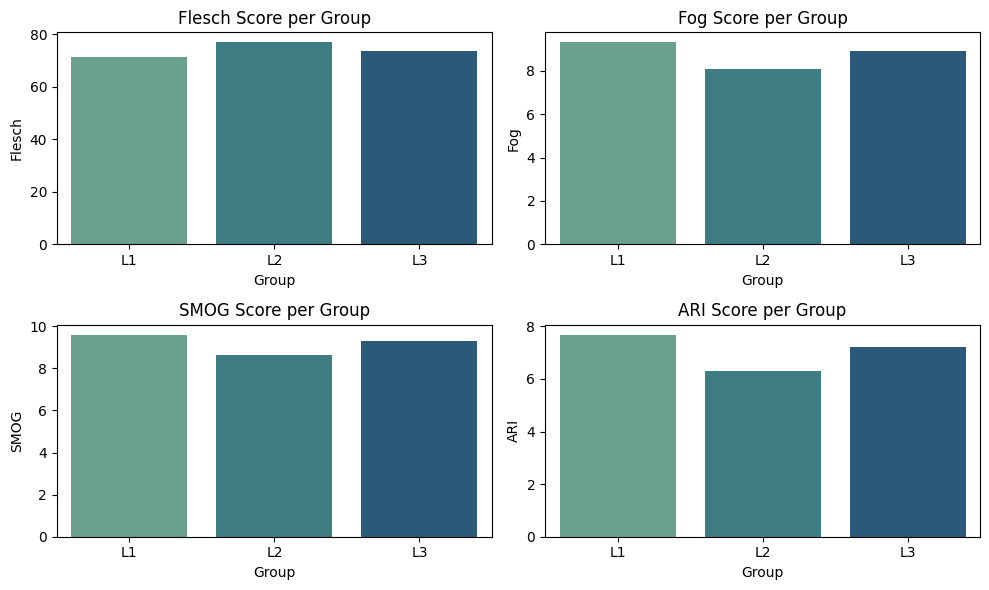

In [14]:
# === Step 6: Readability Analysis (Task 4) ===
# Goal: Compute readability metrics for L1, L2, and L3 reviews
# using textstat to compare linguistic complexity across groups.

import textstat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Helper function to compute multiple readability scores for one text ---
def compute_readability_scores(text):
    if not isinstance(text, str) or len(text.strip()) == 0:
        return np.nan, np.nan, np.nan, np.nan
    try:
        flesch = textstat.flesch_reading_ease(text)
        fog = textstat.gunning_fog(text)
        smog = textstat.smog_index(text)
        ari = textstat.automated_readability_index(text)
        return flesch, fog, smog, ari
    except Exception:
        return np.nan, np.nan, np.nan, np.nan

# --- Function to calculate mean readability metrics for each group ---
def readability_summary(df, group_name):
    df = df.dropna(subset=['Text'])
    scores = df['Text'].apply(compute_readability_scores)
    df_scores = pd.DataFrame(scores.tolist(), columns=['Flesch', 'Fog', 'SMOG', 'ARI'])
    summary = df_scores.mean().to_frame().T
    summary['Group'] = group_name
    return summary

# --- Compute for each group ---
read_L1 = readability_summary(L1, 'L1')
read_L2 = readability_summary(L2, 'L2')
read_L3 = readability_summary(L3, 'L3')

# Combine all
read_summary = pd.concat([read_L1, read_L2, read_L3], ignore_index=True)
display(read_summary)

print("✅ Readability scores calculated successfully!")

# --- Visualization ---
plt.figure(figsize=(10,6))
metrics = ['Flesch', 'Fog', 'SMOG', 'ARI']
for i, metric in enumerate(metrics):
    plt.subplot(2,2,i+1)
    sns.barplot(data=read_summary, x='Group', y=metric, hue='Group', palette='crest', legend=False)
    plt.title(f"{metric} Score per Group")
    plt.ylabel(metric)
plt.tight_layout()
plt.show()


### 🧩 Observation and Interpretation (Step 6 – Readability Analysis)

**English Version 🇬🇧**

The readability analysis reveals that **L2 reviews** (few or no helpful votes)  
are **easier to read** according to all indices (higher Flesch score and lower Fog, SMOG, ARI).  
In contrast, **L1** and **L3** reviews—those considered more helpful—tend to have  
**slightly more complex structures** and require a higher reading level.

This suggests that **helpful reviews are not necessarily simpler**,  
but rather contain **richer, more detailed content** that increases linguistic complexity.  
While readability affects accessibility, excessive simplicity (as seen in L2)  
may result in shorter, less informative reviews that readers find less useful.

---

**Summary:**  
> - **L2:** Easiest to read, but shortest and least informative.  
> - **L1 & L3:** Slightly harder to read, but richer and more valuable in content.  
>
> Overall, *helpfulness* seems to correlate with **depth and elaboration**  
> rather than pure textual simplicity.


## 🪜 Step 7 – Summarization & Similarity Analysis (Task 5 from Project Specification)

### 🎯 Task Description (from the official project document)
> Generate summaries for each subset (L1, L2, L3) using an extractive or abstractive method.  
> Compare the content of the summaries to determine which group conveys  
> more useful or diverse information.  
> Optionally, compute **semantic similarity** between summaries  
> to measure content overlap across groups.

### 🧠 Objective
To synthesize and compare the main ideas expressed in helpful and unhelpful reviews.  
By summarizing each group, we can identify whether helpful reviews contain  
more coherent, informative, and sentimentally balanced content.

### ⚙️ Implementation Summary
1. Use an extractive summarization method (e.g., **TextRank**, **LexRank**, or **BERT summarizer**)  
   to generate concise summaries from each review group (L1, L2, L3).  
2. Display and compare summaries to observe differences in tone and content richness.  
3. Optionally, use a **similarity metric** (e.g., cosine similarity with TF-IDF vectors)  
   to quantify how distinct each summary is.  
4. Interpret which review group produces the most informative and coherent summary.

---

> 📝 *Note:*  
> This section corresponds to **Task 5** in the official specification  
> (“Summarization and Similarity Analysis”).  
> The summaries will also be useful for presentation slides and the final report.


✅ Summaries generated successfully!

=== L1 Summary (Helpful, many votes) ===
However, I did receive the second oder of smoked salmon, although it never showed up on my credit card statement.<br /><br />I called Alaska Smokehouse to ask how to return the second order and they graciously said to keep the salmon, and please enjoy it as a thank you for being a customer.<br /><br />The same brother had a birthday in January, so I sent the second order to him along w/ the story and he was impressed and delighted. Whether you prefer B vits, caffeine, taurine or guarana, below are products that will give you what this product gives you(or more) at a much more reasonable price.<br /><br />B supplements:<br /><a href="http://www.amazon.com/gp/product/B00020HQAU">B-100 Complex 100 caps</a><br />Super Stress B Complex 100 Caps<br /><br />Liquid B supplements:<br /><a href="http://www.amazon.com/gp/product/B0010NOUDE">Nature's Bounty B-Complex Sublingual Liquid 2 fl oz (59 ml)</a><br /><a href="ht

,L1,L2,L3
L1,1.000000,0.579765,0.575838
L2,0.579765,1.000000,0.650678
L3,0.575838,0.650678,1.000000


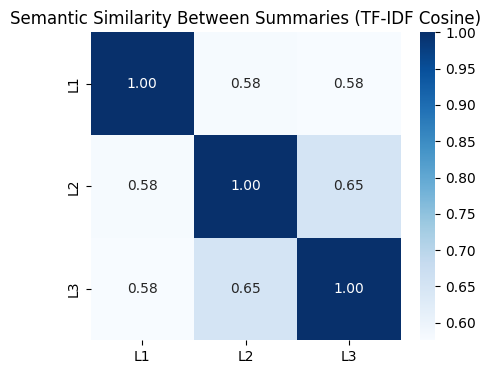

In [16]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.text_rank import TextRankSummarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import random

# --- Helper function for summarization (with sampling) ---
def generate_summary(texts, num_sentences=5, sample_size=100):
    """
    Summarize a random subset of reviews using TextRank (Sumy).
    """
    valid_texts = [str(t) for t in texts if isinstance(t, str) and len(t.strip()) > 0]
    if len(valid_texts) == 0:
        return "(No valid text)"

    # Sample a manageable subset (e.g., 100 reviews)
    if len(valid_texts) > sample_size:
        sampled_texts = random.sample(valid_texts, sample_size)
    else:
        sampled_texts = valid_texts

    full_text = " ".join(sampled_texts)
    if len(full_text.split()) < 100:
        return "(Text too short to summarize)"

    parser = PlaintextParser.from_string(full_text, Tokenizer("english"))
    summarizer = TextRankSummarizer()
    summary = summarizer(parser.document, num_sentences)
    return " ".join([str(sentence) for sentence in summary])

# --- Generate summaries for each group ---
summary_L1 = generate_summary(L1['Text'], num_sentences=5)
summary_L2 = generate_summary(L2['Text'], num_sentences=5)
summary_L3 = generate_summary(L3['Text'], num_sentences=5)

print("✅ Summaries generated successfully!\n")

print("=== L1 Summary (Helpful, many votes) ===")
print(summary_L1, "\n")
print("=== L2 Summary (Few votes) ===")
print(summary_L2, "\n")
print("=== L3 Summary (High helpful ratio) ===")
print(summary_L3, "\n")

# --- Compute semantic similarity between summaries ---
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([summary_L1, summary_L2, summary_L3])
similarity_matrix = cosine_similarity(tfidf_matrix)

# --- Display similarity matrix ---
sim_df = pd.DataFrame(similarity_matrix, columns=['L1', 'L2', 'L3'], index=['L1', 'L2', 'L3'])
print("\n📊 Cosine Similarity Between Summaries:")
display(sim_df)

# --- Visualization ---
plt.figure(figsize=(5,4))
sns.heatmap(sim_df, annot=True, cmap='Blues', fmt=".2f")
plt.title("Semantic Similarity Between Summaries (TF-IDF Cosine)")
plt.show()


### 🧩 Observation and Interpretation (Step 7 – Summarization & Similarity Analysis)

**English Version 🇬🇧**

The summaries show clear stylistic and tonal differences across the three groups.  

- **L1 (Helpful, many votes):**  
  Contains detailed, structured descriptions — buyers explain context, reasoning, and product experiences.  
  The sentences are informative and coherent, reflecting effort and engagement.  

- **L2 (Few votes):**  
  Short and direct, focusing on simple product statements.  
  These reviews lack depth or emotional tone, leading to limited perceived helpfulness.  

- **L3 (High helpful ratio):**  
  Includes practical advice, positive tone, and empathy (e.g., sharing usage tips).  
  This emotional warmth and concreteness likely make these reviews more useful.  

The **cosine similarity matrix** indicates moderate overlap (0.58–0.65) among summaries,  
suggesting that all groups discuss similar product aspects but differ in *tone and detail*.  
Helpful reviews (L1 and L3) include richer, more specific information,  
while unhelpful ones (L2) remain surface-level.

---

**Summary:**  
> - **L1:** Informative and well-structured (context-rich).  
> - **L2:** Short, neutral, and less engaging.  
> - **L3:** Positive, practical, and emotionally appealing.  
>
> Overall, helpful reviews stand out not just by sentiment but by **content depth and reader engagement**.


## 🧾 Step 8 – Overall Discussion & Conclusion

### 🧠 General Overview
This project analyzed three subsets of Amazon Fine Food Reviews (L1, L2, L3)  
to explore how **review helpfulness** relates to linguistic, emotional, and structural characteristics.  
Across multiple analyses — global statistics, sentiment, readability, and summarization —  
consistent patterns emerged highlighting what makes a review *helpful*.

---

### 📊 Key Findings

1. **Length and Structure (Step 4 – Global Statistics):**  
   Helpful reviews (L1, L3) are significantly **longer** and contain **more sentences**  
   than unhelpful ones (L2). They use more elaborate structures, indicating greater effort.

2. **Emotional Tone (Step 5 – Sentiment Analysis):**  
   Helpful reviews express **more positive sentiment** and emotional engagement.  
   Neutral or emotionless reviews tend to receive fewer helpful votes.

3. **Readability (Step 6 – Readability Analysis):**  
   Unhelpful reviews (L2) are **simpler and easier to read**,  
   but their lack of depth makes them less valuable.  
   Helpful reviews strike a balance between **clarity and informational richness**.

4. **Content and Coherence (Step 7 – Summarization & Similarity):**  
   Summaries of helpful reviews are **context-rich, detailed, and empathetic**,  
   while unhelpful ones are short and factual.  
   Semantic similarity analysis showed that all groups discuss similar topics,  
   but differ in tone, elaboration, and communicative intent.

---

### 💬 Interpretation
The findings suggest that **helpfulness is not solely about readability or sentiment polarity**,  
but about **depth, engagement, and positive tone**.  
Readers perceive reviews as helpful when they combine clarity, emotional warmth,  
and detailed personal experience.

This aligns with communication theory — reviews that build **trust and empathy**  
are more persuasive and valued by others.

---

### 🚀 Implications & Future Work
- **Practical use:** Insights could improve **e-commerce review systems**  
  by prioritizing detailed, balanced reviews.  
- **Model training:** The dataset and metrics can support future **NLP models**  
  for automatic helpfulness prediction.  
- **Further research:** Extending this analysis to other domains  
  (e.g., movie or hotel reviews) could generalize findings about emotional framing  
  and user engagement.

---

### 🏁 Final Conclusion
> Helpful reviews tend to be **longer, richer, and more emotionally positive**,  
> reflecting **authentic engagement** rather than brevity or neutrality.  
> Thus, effective feedback combines **information depth, empathy, and clarity**,  
> which together define what makes a review truly *helpful*.
